# Climate Stripes

This example notebook generates climate stripes plots using Python numpy and matplotlib.

Jiwoo Lee (LLNL), 2024-08-23

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Generate a dummay data

In [2]:
# Generate a dummy time series
years = np.arange(1900, 2101)
data = np.random.normal(0, 1, len(years))

## Simple try

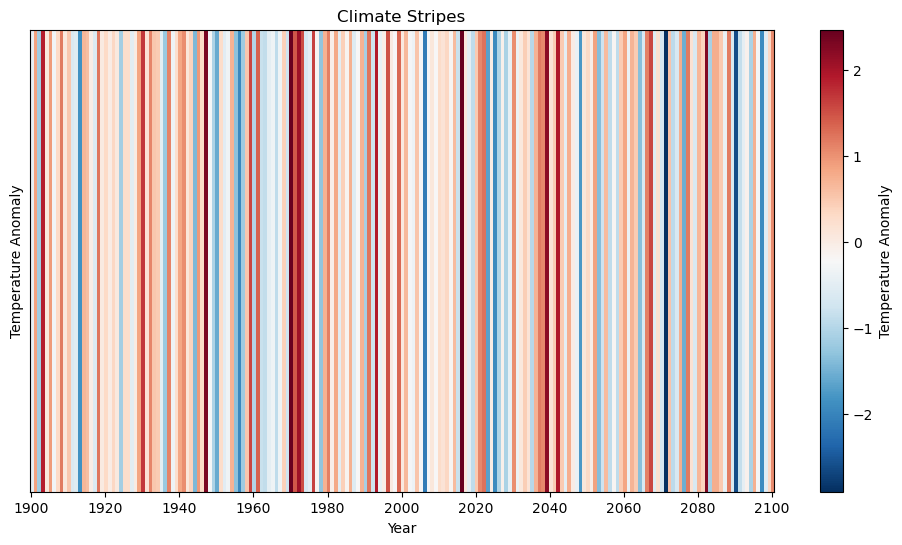

In [3]:
# Create the Climate Stripes plot
fig, ax = plt.subplots(figsize=(12, 6))
im = ax.imshow(data.reshape(1, -1), cmap='RdBu_r', aspect='auto')

# Set the x-axis ticks and labels
tick_positions = np.linspace(0, len(years) - 1, 11, dtype=int)
tick_labels = years[tick_positions]
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)

# Add a colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Temperature Anomaly')

ax.set_yticks([])
ax.set_title('Climate Stripes')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature Anomaly')

plt.show()


## Make it as a reuseable function

### Function Name: `plot_climate_stripes`

### Function Overview

The `plot_climate_stripes` function generates a climate stripes plot, which visually represents temperature anomalies over time using a color gradient. Optionally, it can superimpose a line graph on top of the stripes to show the trends in the data more explicitly. The function is flexible, allowing customization of the line plot through keyword arguments (`**kwargs`).

### Function Signature

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


def plot_climate_stripes(years, data, superimpose_line=False, dark_mode=False, show_bars=False, colormap='RdBu_r', **kwargs):
    """
    Plots climate stripes with options to superimpose a line graph, enable dark mode, display as a bar chart, 
    and use a custom colormap.

    This function visualizes temperature anomalies or similar data over a range of years using a 'climate stripes' 
    approach. It offers options to superimpose a line graph over the stripes, switch to a dark mode background, 
    plot the data as a bar chart, and customize the colormap.

    Parameters
    ----------
    years : np.ndarray
        An array of years corresponding to the data points.
    data : np.ndarray
        An array of temperature anomalies or similar data values.
    superimpose_line : bool, optional
        If True, a line graph will be superimposed on the climate stripes plot. Default is False.
    dark_mode : bool, optional
        If True, the plot will have a dark background with white fonts. Default is False.
    show_bars : bool, optional
        If True, the data will be displayed as a bar chart with bars starting at 0, using the same color scheme as the stripes.
        Default is False.
    colormap : str or matplotlib.colors.Colormap, optional
        The colormap to use for the stripes or bars. Default is 'RdBu_r'.
    **kwargs : dict, optional
        Additional keyword arguments to customize the line plot (e.g., color, linewidth, linestyle).

    Returns
    -------
    fig : matplotlib.figure.Figure
        The matplotlib figure object containing the generated plot.

    Notes
    -----
    - The `dark_mode` parameter changes the background and text color to improve visibility in dark environments.
    - If both `superimpose_line` and `show_bars` are True, the line will be plotted over the bar chart.
    - The colormap can be customized to better suit the data or visual preferences.

    Examples
    --------
    Plot climate stripes with default settings:

    >>> years = np.arange(1900, 2020)
    >>> data = np.random.normal(0, 1, len(years))
    >>> plot_climate_stripes(years, data)

    Plot climate stripes with a superimposed line graph:

    >>> plot_climate_stripes(years, data, superimpose_line=True, color='blue', linewidth=2)

    Plot climate stripes in dark mode with bars:

    >>> plot_climate_stripes(years, data, dark_mode=True, show_bars=True)

    Plot climate stripes using a custom colormap:

    >>> plot_climate_stripes(years, data, colormap='viridis')
    """
    # Set default line color to black if not specified
    line_color = kwargs.pop('color', 'black')
    
    # Set colors for dark mode
    bg_color = 'black' if dark_mode else 'white'
    text_color = 'white' if dark_mode else 'black'
    line_color = 'white' if dark_mode and line_color == 'black' else line_color

    # Create the Climate Stripes plot
    fig, ax = plt.subplots(figsize=(12, 6), facecolor=bg_color)
    
    # Get the specified colormap using the new syntax
    cmap = plt.colormaps.get_cmap(colormap)
    
    if show_bars:
        # Plot data as bars with the same color mapping as stripes
        norm = plt.Normalize(data.min(), data.max())
        bar_colors = cmap(norm(data))
        
        ax.bar(years, data, color=bar_colors, edgecolor='none', width=1.0)
        
        # Show y-axis ticks and labels for bar chart       
        ax.set_ylim(data.min(), data.max())  # Show y-axis value range
        ax.yaxis.set_tick_params(color=text_color)  # Set y-axis tick color
        plt.setp(ax.get_yticklabels(), color=text_color)  # Set y-axis tick labels color
        
    else:
        # Plot the climate stripes
        im = ax.imshow(data.reshape(1, -1), cmap=cmap, aspect='auto',
                       extent=[years.min(), years.max(), data.min(), data.max()])

        # Add a colorbar with the correct font color
        cbar = fig.colorbar(im, ax=ax)
        cbar.set_label('Temperature Anomaly', color=text_color)
        cbar.ax.yaxis.set_tick_params(color=text_color)
        plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color=text_color)

    # Set the x-axis ticks and labels
    tick_positions = np.linspace(years.min(), years.max(), 11, dtype=int)
    tick_labels = years[np.linspace(0, len(years) - 1, 11, dtype=int)]
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(tick_labels, color=text_color)

    # Optionally superimpose a line graph
    if superimpose_line:
        ax.plot(years, data, color=line_color, label='Temperature Anomaly Line', **kwargs)
        ax.set_ylim(data.min(), data.max())  # Show y-axis value range
        ax.yaxis.set_tick_params(color=text_color)  # Set y-axis tick color
        plt.setp(ax.get_yticklabels(), color=text_color)  # Set y-axis tick labels color
        ax.legend(loc='upper left', facecolor=bg_color, edgecolor='none', labelcolor=text_color)
    elif not show_bars:
        ax.set_yticks([])

    # Set plot title and labels with the correct font color
    ax.set_title('Climate Stripes', color=text_color)
    ax.set_xlabel('Year', color=text_color)
    ax.set_ylabel('Temperature Anomaly', color=text_color)
    
    # Set the background color of the axes
    ax.set_facecolor(bg_color)
    
    plt.show()
    
    return fig


#### Parameters

* `years` (`np.ndarray`): An array of years corresponding to the data. This array should be 1-dimensional and should match the length of the data array.
* `data` (`np.ndarray`): An array of temperature anomalies or similar data values. This array should be 1-dimensional and should match the length of the `years` array.
* `superimpose_line` (`bool`, optional): If True, a line graph will be superimposed on the climate stripes plot. Default is False.
* `dark_mode` (`bool`, optional): If True, the plot will have a dark background with white fonts. Default is False.
* `show_bars` (`bool`, optional): If True, the data will be displayed as a bar chart with bars starting at 0, using the same color scheme as the stripes. Default is False.
* `colormap` (`str` or `matplotlib.colors.Colormap`, optional): The colormap to use for the stripes or bars. Default is `RdBu_r`.
* `**kwargs` (`dict`, optional): Additional keyword arguments to customize the line plot (e.g., color, linewidth, linestyle)

#### Returns

* `fig` (`matplotlib.figure.Figure`): The matplotlib figure object containing the generated plot. This object can be used for further customization or saving the plot to a file.

#### Notes

* The `dark_mode` parameter changes the background and text color to improve visibility in dark environments.
* If both `superimpose_line` and `show_bars` are `True`, the line will be plotted over the bar chart.
* The colormap used is `RdBu_r`, which is suitable for visualizing temperature anomalies. You can change this by passing a custom colormap to the `colormap` parameter.

### Example Usage

In this example:

1. A dummy dataset is generated for the years 1900 to 2100 with random temperature anomalies.
2. The `plot_climate_stripes` function is called with the option to superimpose a line graph.
3. The line graph is customized using `linewidth` and `linestyle` parameters.
4. The resulting figure is saved to a file named `climate_stripes_plot.png` with a resolution of 300 DPI.

Notes

1. The climate stripes are plotted using the `RdBu_r` colormap, which is suitable for representing temperature anomalies (red for warmer, blue for cooler).
2. The function sets the x-axis ticks and labels to cover the range of years automatically.
3. When a line graph is not superimposed, the y-axis ticks are hidden for a cleaner appearance of the stripes.
4. The `fig` object returned by the function can be further modified or saved to various file formats (e.g., `.png`, `.jpg`, `.pdf`).

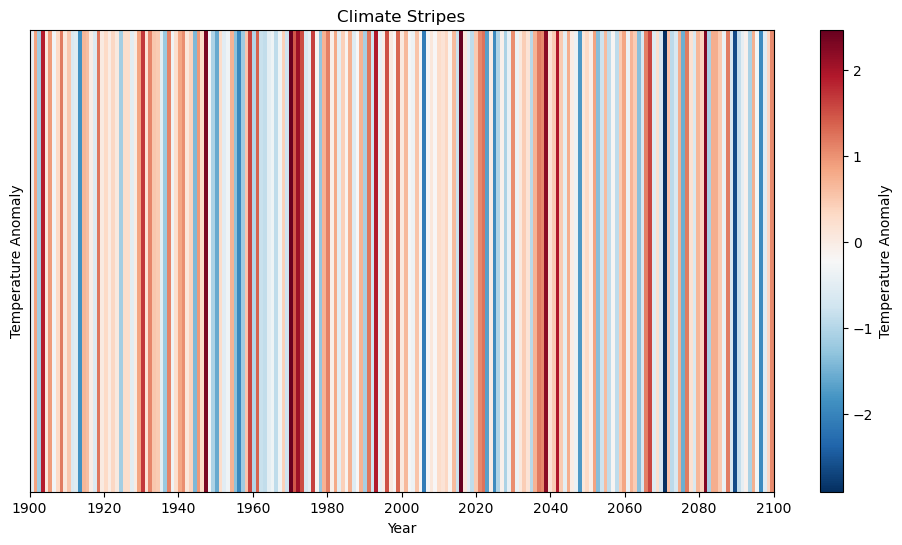

In [5]:
# Call the function
fig = plot_climate_stripes(years, data)

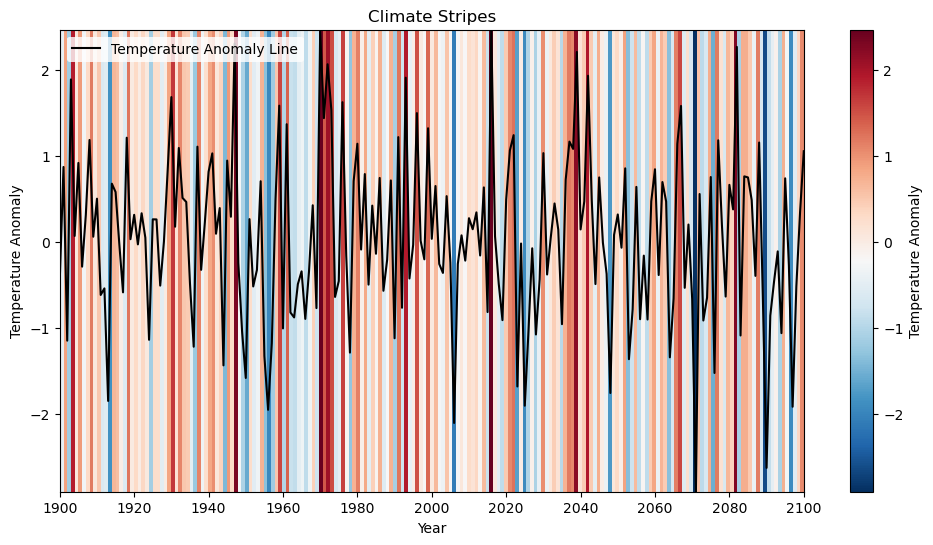

In [6]:
# Call the function with the line graph superimposed
fig = plot_climate_stripes(years, data, superimpose_line=True)

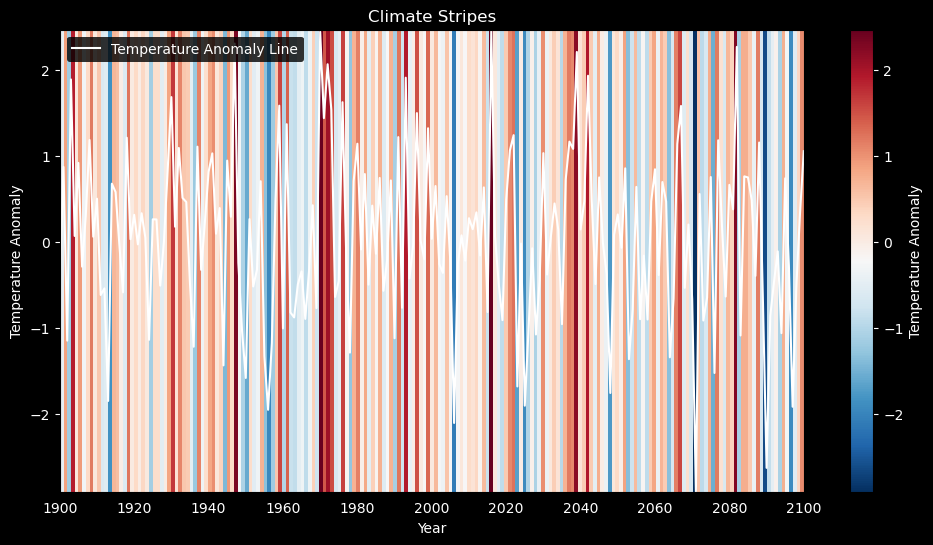

In [7]:
# Call the function with the line graph superimposed, plot in dark mode style
fig = plot_climate_stripes(years, data, superimpose_line=True, dark_mode=True)

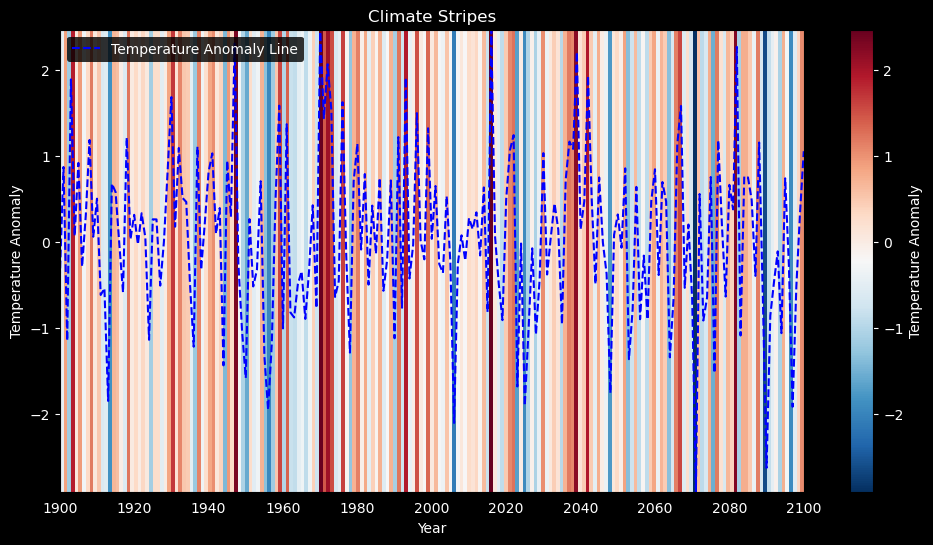

In [8]:
# Call the function with the line graph superimposed, using kwargs for customization
fig = plot_climate_stripes(years, data, superimpose_line=True, dark_mode=True, color='blue', linestyle='--')

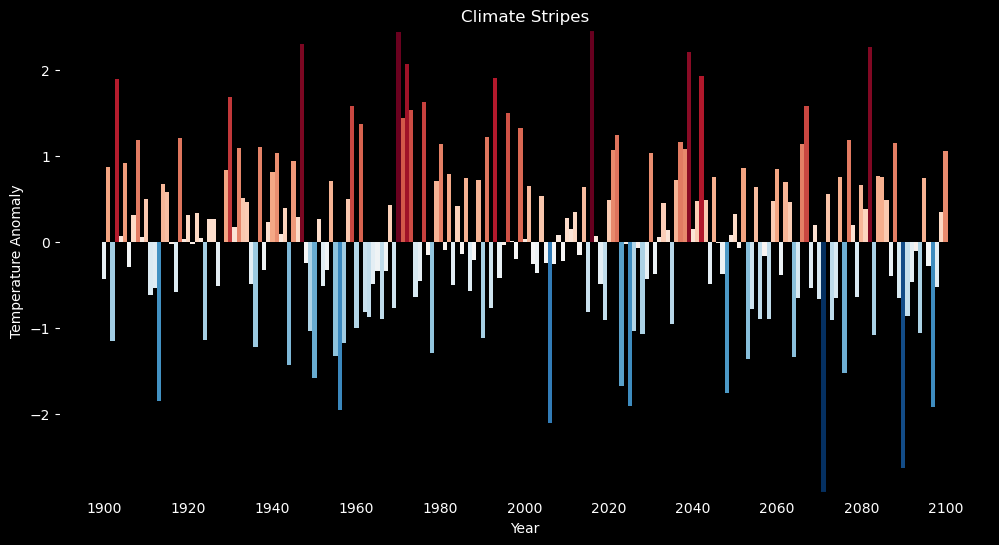

In [9]:
# Call the function with the line graph superimposed, using kwargs for customization
fig = plot_climate_stripes(years, data, dark_mode=True, show_bars=True)

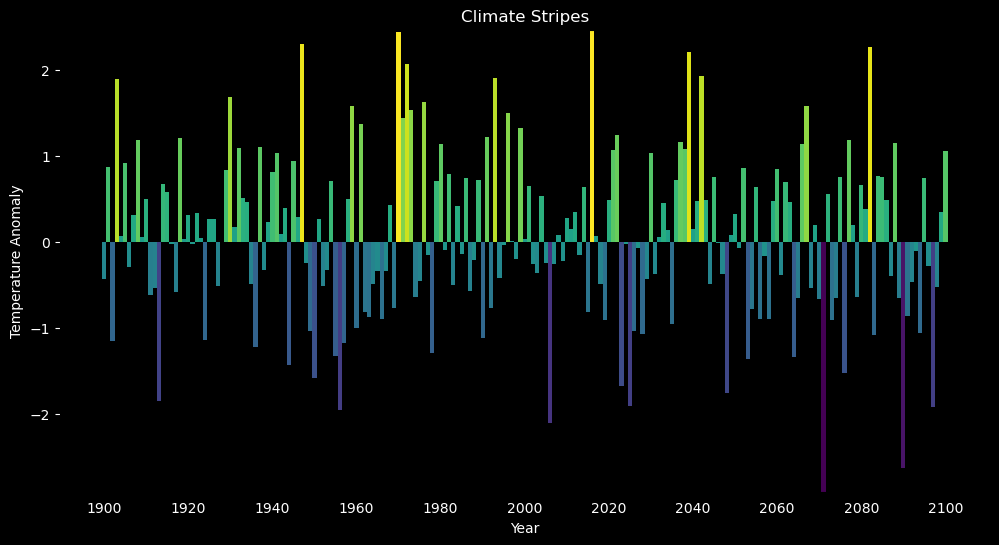

In [10]:
# Call the function with the line graph superimposed, using kwargs for customization
fig = plot_climate_stripes(years, data, dark_mode=True, show_bars=True, colormap='viridis')

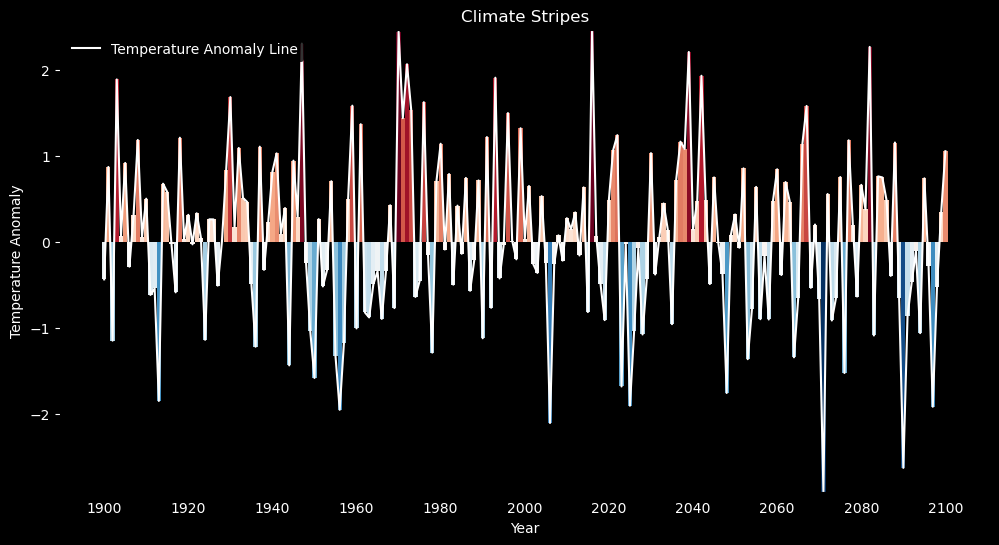

In [11]:
# Call the function with the line graph superimposed, using kwargs for customization
fig = plot_climate_stripes(years, data, superimpose_line=True, dark_mode=True, show_bars=True)

In [12]:
# Save the figure to a file if needed

# fig.savefig('climate_stripes_plot_dark_mode.png', dpi=300, facecolor=fig.get_facecolor())